In [ ]:
import pandas as pd

In [ ]:
#loading diabetes dataset to the pandas dataframe
diabetes=pd.read_csv('/content/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#diabetes prediction of female
# pregnancies -number of pregnancies
#glucose level,blood pressure
#skinthickness- skin thickness is taken from triceps(tells some fst is stored in particular muscel)
# body mass indexing(BMI) - which is calculated by dividing height and weightsquared
#DiabetesPedigreeFunction -some diabetes values and age is the age of the person
#outcome is label(output) 1 indicates diabetes and 0 indicates non diabetes
# we develop a model that classify that

In [ ]:
# to know the number of  rows and columns
diabetes.shape

(768, 9)

In [ ]:
# getting sstatical method of the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

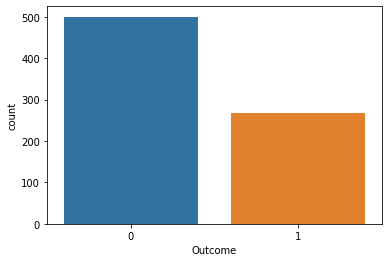

In [ ]:
import seaborn as sns
sns.countplot(x='Outcome',data=diabetes)

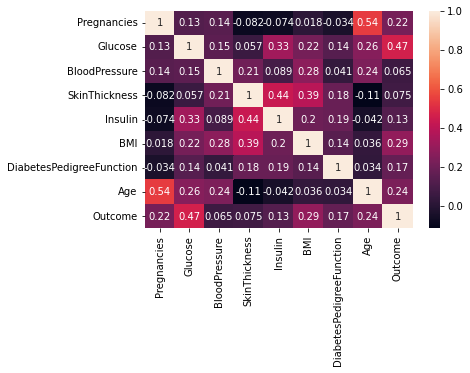

In [ ]:
#correlation matrix to show the correlation between two variables
#correlation between glucose and outcome is 47% so output depends on majority of glucose
corr_mat=diabetes.corr()
sns.heatmap(corr_mat,annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'glucose')

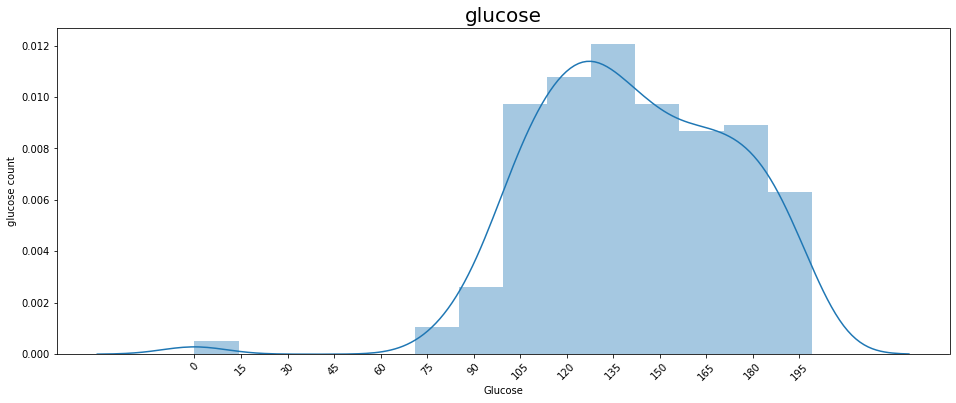

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#glucose for diabetes
fig=plt.figure(figsize=(16,6))
sns.distplot(diabetes['Glucose'][diabetes['Outcome']==1])
plt.xticks([i for i in range(0,201,15)],rotation=45)
plt.ylabel("glucose count")
plt.title("glucose",fontsize=20)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

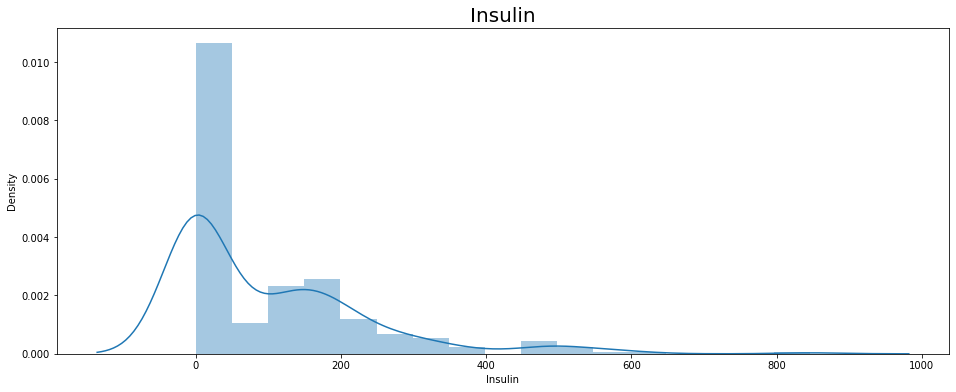

In [ ]:
#insulin for diabetic
fig=plt.figure(figsize=(16,6))
sns.distplot(diabetes['Insulin'][diabetes['Outcome']==1])
plt.xticks()
plt.title("Insulin",fontsize=20 )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

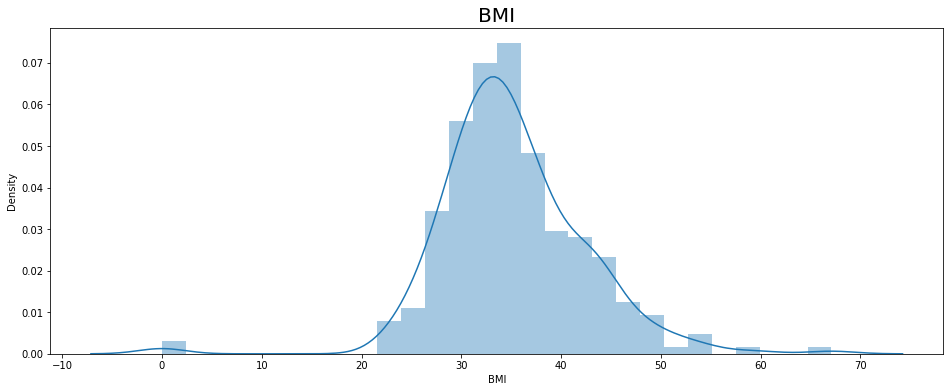

In [ ]:
#BMI for diabetic
fig=plt.figure(figsize=(16,6))
sns.distplot(diabetes['BMI'][diabetes['Outcome']==1])
plt.xticks()
plt.title("BMI",fontsize=20 )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DiabetesPedigreeFunction\t')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


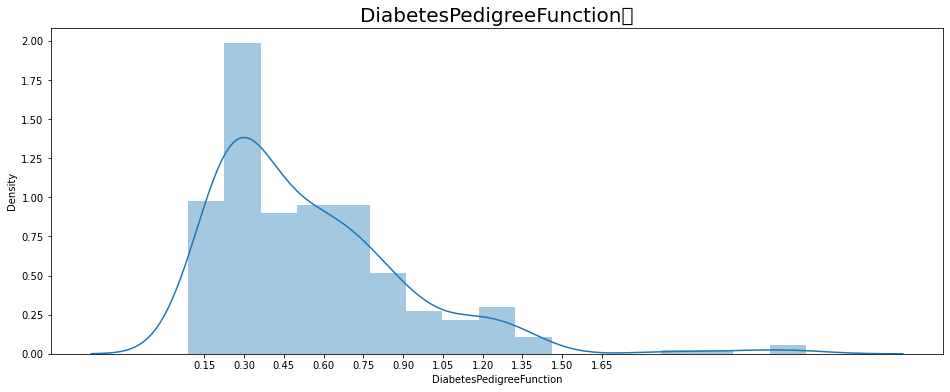

In [ ]:
#for DiabetesPedigreeFunction	 diabetic
fig=plt.figure(figsize=(16,6))
sns.distplot(diabetes['DiabetesPedigreeFunction'][diabetes['Outcome']==1])
plt.xticks([i*0.15 for i in range (1,12)])
plt.title("DiabetesPedigreeFunction	",fontsize=20 )


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

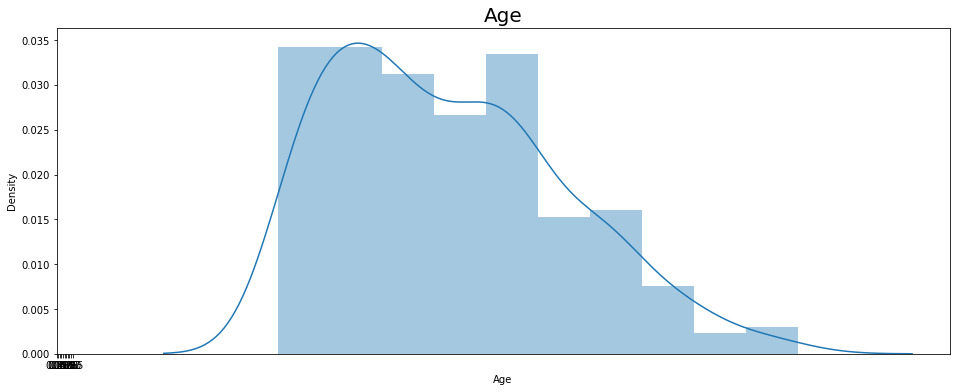

In [ ]:
#for Age diabetic
fig=plt.figure(figsize=(16,6))
sns.distplot(diabetes['Age'][diabetes['Outcome']==1])
plt.xticks([i*0.15 for i in range (1,12)])
plt.title("Age",fontsize=20 )


In [ ]:
diabetes.groupby('Outcome').mean()   # label 0 represents non diabetic 
                                     # label 1 represents diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#input(features)
x=diabetes.drop(['Pregnancies','BloodPressure',	'SkinThickness'	,'Outcome'],axis=1).values
x

array([[148.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [ 85.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [183.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [126.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [ 93.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

In [ ]:
#output(label)
y=diabetes.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(768, 5) (614, 5) (154, 5)


In [ ]:
#Feature scaling-to standardize the independent feature present in the fixed range
#if feture is not done , then machine learning algorithm tends to weigh greater values , heigher and considerd small
#values as lower values ,regardless of the unit of values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.91569367,  0.3736349 ,  0.37852648,  0.67740401,  1.69955804],
       [-0.75182191, -0.69965674, -0.50667229, -0.07049698, -0.96569189],
       [ 1.38763205,  5.09271083,  2.54094063, -0.11855487, -0.88240283],
       ...,
       [-0.84620959, -0.69965674, -0.94927168, -0.95656442, -1.04898095],
       [-1.12937261, -0.69965674, -0.26640405, -0.50001442,  0.11706589],
       [ 0.47521786, -0.69965674, -4.07275877,  0.52121586,  2.94889395]])

Model1-K Nearest Neighbor classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred1=model1.predict(x_test)
y_pred1

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

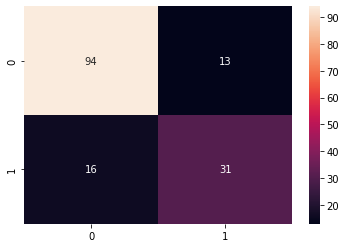

In [ ]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pred1)
sns.heatmap(conf,annot=True)

In [ ]:
# The above heatmap says 0,0 means True negative and 1,1 means true positive
#and 0,1 even person is negative and result shows positive
#and 1,0 means person is positive but the result shows negative

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8116883116883117


 model2(SVM)

In [ ]:
from sklearn.svm import SVC
model2=SVC()

In [ ]:
model2.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.7987012987012987

Logistic Regression